# Document Classification of Computer Science Article Abstracts

# 1. Introduction 

In this project I will be using a supervised learning algorithm to classify abstracts from different topics in computer science research. This will be a challanging task as the difference between abstracts in one field is nuanced, with a high degree of overlap between words or features meaning data is possibly co-linear. Therefore, this task will test the models ability to find differences in similar texts.





# 2. Methodology

## 2.1 Webscraping abstracts

In [ ]:
# Due to the large amount of requests, I executed this code in a seperate notebook and created a csv file
# below is the code used to create this file

#import requests
#from bs4 import BeautifulSoup as btfs
#import re 
#abstracts = []

#def webscrape(part1,part2):
    #count = 0
    #for i in range(0,201):
        #html = requests.get('https://core.ac.uk/search?q='+part1+'+'+part2+
                            #'+AND+fieldsOfStudy%3A"computer+science"&page='+str(i)).text
        #soup = btfs(html,'html.parser')

        #for link in soup.find_all('span'):
            #if len(str(link)) > 600:
                #text = btfs(str(link),"lxml").text
                #if text[0] != 'ℓ':
                    #if text[0] != '1':
                        #abstracts.append(text[0:300])
                        #count += 1
    #print(count)

In [ ]:
# created a second webscraping function to start from page 200 as some topics 
# returned a lower number of abstracts but ended up getting 0 extra abstracts in some
#def webscrape2(part1,part2):
    #count = 0
    #for i in range(201,502):
        #html = requests.get('https://core.ac.uk/search?q='+part1+'+'+part2+
                            #'+AND+fieldsOfStudy%3A"computer+science"&page='+str(i)).text
        #soup = btfs(html,'html.parser')

        #for link in soup.find_all('span'):
            #if len(str(link)) > 600:
                #text = btfs(str(link),"lxml").text
                #if text[0] != 'ℓ':
                    #if text[0] != '1':
                        #abstracts.append(text[0:300])
                        #count += 1
    #print(count)

In [ ]:
#webscrape('reinforcement','learning') # returned 1248 abstracts

In [ ]:
#webscrape('supervised','learning') # returned 1399 abstracts

In [ ]:
#webscrape('unsupervised', 'learning') # returned 1223 abstracts

In [ ]:
#webscrape('inductive','learning') # returned 260 abstracts

In [ ]:
#webscrape('transfer','learning') # returned 879 abstracts

In [ ]:
#webscrape2('reinforcement','learning') # returned 0 extra abstracts

In [ ]:
#webscrape2('supervised','learning') # returned 917 abstracts

In [ ]:
#webscrape2('unsupervised', 'learning') # returned 606 abstracts

In [ ]:
#webscrape2('inductive','learning') # returned 0 extra abstracts

In [ ]:
#webscrape2('transfer','learning') # returned 1099 abstracts

In [ ]:
#labels = ['reinforcement learning' for i in range(1248)]
#[labels.append('supervised learning') for i in range(1399)]
#[labels.append('unsupervised learning') for i in range(1223)]
#[labels.append('inductive learning') for i in range(260)]
#[labels.append('transfer learning') for i in range(879)]
#[labels.append('supervised learning') for i in range(917)]
#[labels.append('unsupervised learning') for i in range(606)]
#[labels.append('transfer learning') for i in range(1099)]

In [ ]:
#import pandas as pd
#data = list(zip(labels,abstracts))
#df = pd.DataFrame(data, columns=['Label','Abstract'])

In [ ]:
#df.to_csv('abstracts.csv', index=False)

## 2.2 Preprocessing

Word embeddings will be used instead of one hot encoding tokens as this method is computationally efficienct and will capture relationships between features [1].

A word embedding is a vector of numbers which correspond to a word and its relationship to other words within the data. Word embeddings are learned within a neural network, although there are pre-trained word embeddings derived from large amounts of data.

### 2.2.1 Abstracts dataframe

In [1]:
# as I am just reading files I will use this method
from google.colab import files
import io

uploaded = files.upload()


Saving abstracts.csv to abstracts.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['abstracts.csv']))

In [3]:
print(df)

                       Label  \
0     reinforcement learning   
1     reinforcement learning   
2     reinforcement learning   
3     reinforcement learning   
4     reinforcement learning   
...                      ...   
7626       transfer learning   
7627       transfer learning   
7628       transfer learning   
7629       transfer learning   
7630       transfer learning   

                                               Abstract  
0     In this article we study the transfer learning...  
1     Cross-situational word learning is based on th...  
2     In recent years, attention has been focused on...  
3     Reinforcement learning is considered to be a s...  
4     Join order selection plays a significant role ...  
...                                                 ...  
7626  The multiple ideal query (MIQ) model was intro...  
7627  Evaluation of business processes plays a signi...  
7628  The design process of complex systems in all t...  
7629  The mobile data traffic has r

In [4]:
# creates a new column label_type which corresponds to values in label column
# There are 5 classes

labeldict = {'reinforcement learning':0,'supervised learning':1,'unsupervised learning':2,'inductive learning':3,'transfer learning':4}

# for each row in the new column, if the corresponding row in Label is a key in the dictionary the row in the new column will be set to 
# the value of the matching key, if not it will be set to 5
for i in range(len(df)):
  df.loc[i,'label_type'] = np.where(df.loc[i,'Label'] in labeldict.keys(), labeldict[str(df.loc[i,'Label'])], 5)


In [5]:
# check that everything was coded correctly, there are no rows with a 5
print(df.loc[df['label_type']==0])
print(df.loc[df['label_type']==1])
print(df.loc[df['label_type']==2])
print(df.loc[df['label_type']==3])
print(df.loc[df['label_type']==4])
print(df.loc[df['label_type']==5])
 

                       Label  \
0     reinforcement learning   
1     reinforcement learning   
2     reinforcement learning   
3     reinforcement learning   
4     reinforcement learning   
...                      ...   
1243  reinforcement learning   
1244  reinforcement learning   
1245  reinforcement learning   
1246  reinforcement learning   
1247  reinforcement learning   

                                               Abstract  label_type  
0     In this article we study the transfer learning...         0.0  
1     Cross-situational word learning is based on th...         0.0  
2     In recent years, attention has been focused on...         0.0  
3     Reinforcement learning is considered to be a s...         0.0  
4     Join order selection plays a significant role ...         0.0  
...                                                 ...         ...  
1243  The quality of the material collected by a con...         0.0  
1244  Manipulators based on soft robotic technologie...

In [59]:
def r(data):
  import random
  return random.randint(0,len(data))

# to double check that length of abstracts were sliced correctly (300 words) 
# I printed the length of 20 random abstracts

[print(len(df.iloc[r(df),1])) for i in range(20)]


300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from math import trunc

abstracts = list(df['Abstract'])

tokenizer = Tokenizer() # as there is not much data I have not passed the num_words argument
tokenizer.fit_on_texts(abstracts) # builds word index 
sequences = tokenizer.texts_to_sequences(abstracts) # turns each string in abstracts into a sequence/list of integers that correspond to each word in word index

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens') # 17679 unique tokens were found which means there is a vocabulary of 17679 unique words in abstracts


Found 17679 unique tokens


In [7]:
# as there are 100 values for each word in the glove word embeddings, sequences will be padded to 100
maxlen = 100
data = pad_sequences(sequences, maxlen=maxlen) 

labels = np.asarray(df['label_type']) 
print(f'Shape of data tensor: {data.shape}') # 7631 rows of sequences with 61 tokens for each sequence (rank 2 tensor)
print(f'Shape of label tensor: {labels.shape}') # 7631 labels (rank 1 tensor)



Shape of data tensor: (7631, 100)
Shape of label tensor: (7631,)


In [101]:
# creates array of numbers ranging from 0 to the amount of rows in data and uses 
# them to shuffle data and labels while keeping the correct labels with data
indices = np.arange(data.shape[0]) 
np.random.shuffle(indices) 
training_samples = trunc(len(df)*2/3) 
validation_samples = trunc(len(df)*1/6)


data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples+1]
y_val = labels[training_samples:training_samples+validation_samples+1]

x_test = data[training_samples+validation_samples+1:training_samples+validation_samples+1+validation_samples]
y_test = labels[training_samples+validation_samples+1:training_samples+validation_samples+1+validation_samples]

7630

### 2.2.2 Pretrained word embedding

As the abstracts data is domain specific the algorithm may reach higher accuracy with task-specific word embeddings generated from scratch. Conversely, there is not much data so using pre-trained word embeddings may lead to higher accuracy. 

Both methods will be tested and hyperparameters of the best performing model will be adjusted for improved accuracy.

In [9]:
from google.colab import files
import io

uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [10]:
# every line in the file is split by whitespace, the embeddings_index dictionary
# is updated with the word (which is the first value in each line) as a key and 
# the rest of the line is the word embedding and value
f = open('glove.6B.100d.txt','r')
f = f.readlines()
embeddings_index = {}

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs


print(f'Found {len(embeddings_index)} word vectors')


Found 400000 word vectors


In [11]:
import itertools as it

embedding_dim = maxlen
max_words = len(word_index)

# an embedding matrix is formed using tokens from the abstracts word index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word) # token from word_index is used to get the embedding vector of said token from embeddings_index dict
  if i < max_words:
    if embedding_vector is not None: # words not found in embeddings_index will be kept as zeros
      embedding_matrix[i] = embedding_vector 
      # each row of embedding_matrix corresponds to 100 dim vector of pre-trained word embedding for words in abstracts


## 2.3 Deep learning models

### 2.3.1 Error analysis
Using max_words = 17679, which is the amount of words in the vocabularly of the abstracts data, led to an error (indices[5,72] = 17679 is not in [0, 17679]).  A value of 17679 would not be in [0,17679] as this is a non-inclusive interval, so the interval would need to be changed to 17680 or this value would need to be removed. 

I checked this index for both the data and embedding matrix and neither were 17679. I also checked the word_index dictionary to find the maximum value, which is indeed 17679. I considered finding the row/rows that had this number and changing them to zeros but decided on a method that would lead to the least information loss, also, the indices array I created is one dimensional so I assume that the indices of this error is referring to one of the layers of the model so deleting the values from the data may not have solved the problem.

I made the input_dim 17680 (max_words+1) and added an extra row of zeros to the embedding matrix/weight matrix to accomodate value 17679, which fixed the error. 

### 2.3.2 Model 1

This model will utilise a mini-batch supervised learning algorithm to learn a function that seperates sequences of word embedding vectors into 5 different classes/categories. The parameters of this function, the weights, are what the algorithm will adjust to fit the data.

Model 1 = $ f(x) = \sigma ({\textbf{W}}_{ix}^{3}(R({\textbf{I}}_{ij}{\textbf{W}}_{ik}^{2}))) $

where:

j = flattened matrix = $ {\textbf{I}}_{ij}{\textbf{W}}_{j*}^{1} \hspace{0.25cm} $ j* = all columns of jth row $ \hspace{0.25cm} {\textbf{W}}^{1} $ = n x 100 pre-trained word embedding matrix

W = weight = kernel 

I = input = n x 100 sequence matrix

$ \sigma $ = softmax

R = ReLu


# Forward propagation

## Input layer

The input layer is an embedding layer, so weights at this layer consist of a matrix where the row/embedding at index j corresponds to the jth word index in the sequence matrix. Weights at this layer are pretrained and are not updated during gradient descent. 

The matrix is flattened which multiplies the word indicies for each sequence with their corresponding embedding. 

## Hidden layer

The input matrix is multipled by a randomly generated weight matrix of dimension n x 32 which transforms the input to an n x 32 dimension matrix.

A ReLu activation function is then applied to the matrix at this layer

ReLu essentially activates the non-linear relationship between the inputs and corresponding outputs which creates a differentiable non-linear function with local and global minima that allow the function to be optimized

## Output layer

At the output layer the incoming matrix is multipled by an n x 5 matrix of random values, a softmax function is then applied which outputs values between 0 and 1. These values correspond to the probability that the given sequence belongs to each class.


# Backwards Propagation

On the first epoch the output will be the result of random weight initializations (which are random small numbers sampled from a uniform distribution by default)

This model utilises root mean squared propagation (rmsprop) with sparse categorical crossentropy (scc) to calculate the loss/error. Scc was chosen due to there being 5 integer classes rather than 2 binary classes or one hot encoded classes. Scc calculates how much the actual output deviated from the desired output by calculated the negative log-liklihood or cross entropy [2]. Rmsprop updates weights by adjusting the learning rate according to a moving average of derivatives of parameters, so the algorithm will converge to a local or global minima faster [3]. The learning rate, $ \alpha $ , is thus multiplied by $ \frac{dW}{\sqrt{S_{dW}+\epsilon }} $

where:

$ dW $ = derivative of weights with respect to the error at this layer

$ S_{dW} $ = moving average of derivatives = $ \beta S_{dW} + (1-\beta )dW^{2} $

$ \epsilon $ = a very small number that prevents the equation from yielding an imaginary number

So the model will backpropgate through each layer (except the input layer which has pre-trained weights) to find the derivative of the weights with respect to the error, which is an estimation for how much each weight contributed to the error. The error is calculated via sparse categorical crossentropy (as embeddings with float values have been used rather than one hot encoding of words). 

## Backprop - Output layer

The error is calculated via categorical cross entropy

E = $ -\sum_{i=1}^{n} y_{i}log(\hat{y}_{i}) $

where:

n = number of classes

$ y_{i} $ = desired outputs for each sample

$ \hat{y}_{i} $ = actual outputs for each sample

Weights are updated via rmsprop

$ W_{i}^{3} = W_{i}^{3} - \alpha \frac{dW_{i}^{3}}{\sqrt{S_{dW_{i}^{3}}+\epsilon }} $

$ dW_{i}^{3} $ is found using the derivative of the softmax function

## Backprop - Hidden layer


$ W_{i}^{2} = W_{i}^{2} - \alpha \frac{dW}{\sqrt{S_{dW}+\epsilon }} $

where:

$ dW_{i}^{2} $ is found using the derivative of the ReLu function

## Backprop - Input layer
weights in the input layer are not trainable/fixed

In [84]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=100)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax')) 
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 100)          1768000   
                                                                 
 flatten_17 (Flatten)        (None, 10000)             0         
                                                                 
 dense_34 (Dense)            (None, 32)                320032    
                                                                 
 dense_35 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,088,197
Trainable params: 2,088,197
Non-trainable params: 0
_________________________________________________________________


In [85]:
B = np.zeros(100)
embedding_matrix2 = np.vstack([B,embedding_matrix])

model.layers[0].set_weights([embedding_matrix2])
model.layers[0].trainable = False # during backpropgation this layer is not updated

In [86]:
model.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
159/159 [==============================] - 2s 10ms/step - loss: 1.5437 - acc: 0.2896 - val_loss: 1.4789 - val_acc: 0.2814
Epoch 2/20
159/159 [==============================] - 1s 8ms/step - loss: 1.4324 - acc: 0.3330 - val_loss: 1.4934 - val_acc: 0.2877
Epoch 3/20
159/159 [==============================] - 1s 8ms/step - loss: 1.3545 - acc: 0.3949 - val_loss: 1.5368 - val_acc: 0.2547
Epoch 4/20
159/159 [==============================] - 1s 9ms/step - loss: 1.2389 - acc: 0.4572 - val_loss: 1.6373 - val_acc: 0.2241
Epoch 5/20
159/159 [==============================] - 1s 8ms/step - loss: 1.1081 - acc: 0.5317 - val_loss: 1.7136 - val_acc: 0.2374
Epoch 6/20
159/159 [==============================] - 2s 12ms/step - loss: 0.9715 - acc: 0.5990 - val_loss: 1.9702 - val_acc: 0.2225
Epoch 7/20
159/159 [==============================] - 1s 7ms/step - loss: 0.8470 - acc: 0.6556 - val_loss: 1.9678 - val_acc: 0.2193
Epoch 8/20
159/159 [==============================] - 1s 7ms/step - loss: 

As there are 5 classes, random guesses would yield 20% (0.2 or 1/5) accuracy, thus, the model largely overfit on the test data which led to random guesses on the validation data

I will now plot the results

In [87]:
# class to plot results for all models

def plot_results(accc,val_accc,losss,val_losss):
  epochs = range(1,len(accc)+1)
  plt.plot(epochs, accc, 'bo', label='Training acc')
  plt.plot(epochs, val_accc, 'b', label='Validation acc')
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, losss, 'bo', label='Training loss')
  plt.plot(epochs, val_losss, 'b', label='Validation loss')
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
    

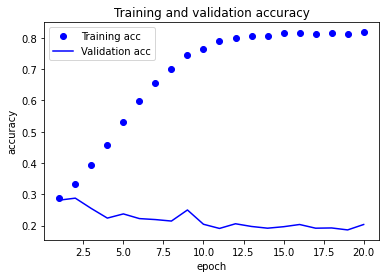

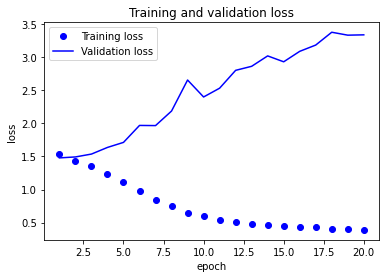

In [88]:
plot_results(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

The model closely overfit to the training data which led to very poor performance on the validation data, with accuracy amounting to a random guess. This is possibly due to the specialized nature of the sequences which would not have been fully mapped to the glove word embeddings, there must have been a large amount of information loss with many 0's in the dataset which have no meaning to the model. Sequences were also padded with 0's to match the word embedding data and an extra row of zeros was added to the weight vector at the input layer.

Additionally, the model was trained on only 5000 samples

### 2.3.3 Model 2

The only difference between model 2 and model 1 is that a word embedding will be learnt from scratch so the input layer will be trainable and sequences will be padded to the longest sequence in the abstracts data.

In [60]:
# check if the lengths stayed the same
[print(len(sequences[r(sequences)])) for i in range(20)]

42
45
44
42
41
48
43
50
46
42
41
44
39
49
46
49
47
44
49
42


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [90]:
data2 = pad_sequences(sequences) # sequences will be padded to longest sequence in list

data2 = data2[indices]

x_train2 = data2[:training_samples]
x_val2 = data2[training_samples:training_samples+validation_samples+1] # dimensions changed due to no longer using glove word embeddings
x_test2 = data2[training_samples+validation_samples+1:training_samples+validation_samples+1+validation_samples]

In [91]:
sequence_vector = len(data2[1])

model2 = Sequential()
model2.add(Embedding(max_words+1, sequence_vector, input_length=sequence_vector)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(5,activation='softmax')) 
model2.summary()

model2.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(x_train2, y_train, epochs=20, batch_size=32, validation_data=(x_val2, y_val))


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 61, 61)            1078480   
                                                                 
 flatten_18 (Flatten)        (None, 3721)              0         
                                                                 
 dense_36 (Dense)            (None, 32)                119104    
                                                                 
 dense_37 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,197,749
Trainable params: 1,197,749
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
159/159 [==============================] - 2s 10ms/step - loss: 1.4792 - acc: 0.2959 - val_loss: 1.4561 - val_acc: 0.3082
Epoch 2/20
159/159 [======================

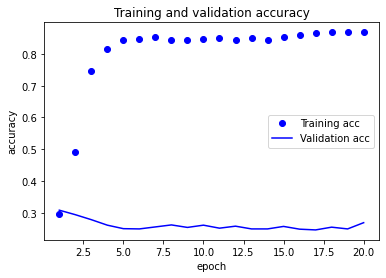

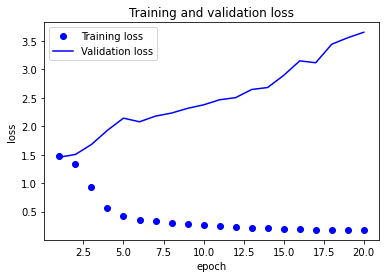

In [92]:
plot_results(history2.history['acc'],history2.history['val_acc'],history2.history['loss'],history2.history['val_loss'])


There is less variation in the accuracy of model 2 and it learnt faster on the training data which suggests that it performed slightly better than model 1

I will now add l2 regularization to model 2 to attempt to reduce overfitting

In [93]:
from tensorflow.keras import regularizers
model2_1 = Sequential()
model2_1.add(Embedding(max_words+1, sequence_vector, input_length=sequence_vector)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model2_1.add(Flatten())
model2_1.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model2_1.add(Dense(5,activation='softmax')) 
model2_1.summary()

model2_1.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history2_1 = model2_1.fit(x_train2, y_train, epochs=20, batch_size=32, validation_data=(x_val2, y_val))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 61, 61)            1078480   
                                                                 
 flatten_19 (Flatten)        (None, 3721)              0         
                                                                 
 dense_38 (Dense)            (None, 32)                119104    
                                                                 
 dense_39 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,197,749
Trainable params: 1,197,749
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
159/159 [==============================] - 3s 15ms/step - loss: 1.4950 - acc: 0.2986 - val_loss: 1.4714 - val_acc: 0.3042
Epoch 2/20
159/159 [======================

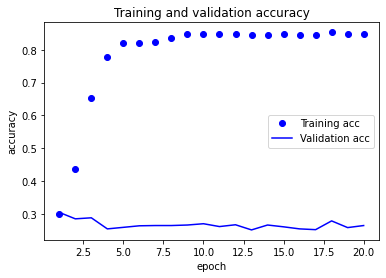

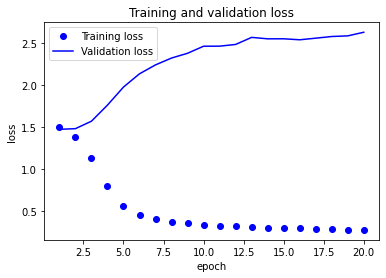

In [94]:
plot_results(history2_1.history['acc'],history2_1.history['val_acc'],history2_1.history['loss'],history2_1.history['val_loss'])


L2 regularization did not significantly improve the performance of this model


# 3. Results

Model 2 performed the best, although both models largely overfit to the training data and did not perform well on validation data. L2 regularization did not significantly improve the performance of the model

I will now test this model on new data

In [100]:
print(y_test.shape)

(1271, 100)


In [102]:
model2_1.evaluate(x_test2,y_test)

40/40 [==============================] - 0s 2ms/step - loss: 2.6743 - acc: 0.2518


[2.6743006706237793, 0.2517702579498291]

# 4. Conclusion

The model largely overfit to the training data due to there being a lack of data. Using a pre-trained word embedding led to slightly more variation in the validation accuracy but both models trended downwards towards 0.2 or 20% in validation accuracy, suggesting the model could not optimize the function for this data.

There were 2,088,197 parameters in model 1 and 1,197,749 parameters in model 2 with only ~ 5000 training samples, so this is probably the cause of the overfitting

L2 regularization did not significantly improve the model. More data would be needed to significantly reduce overfitting and determine whether this model architecture can find the optimal parameters for a function of this type of data. Although, research has shown that more complex architectures are needed for nlp tasks where classes are highly co-linear.

# 5. References

[1] F. Chollet, Deep learning with Python, New York: Manning Publications, 2018, pp. 170.

[2] I. Goodfellow, Y. Bengio, A. Courville, Deep Learning,  Massachusetts: MIT press, 2017.

[3] A. Ng, “RMSProp (C2W2L07)“, YouTube, 25 Aug, 2017. [Video file]. Available: https://youtu.be/_e-LFe_igno [Accessed: Nov. 12, 2022].
